# INFORMACIÓN DEL PROYECTO

### TÍTULO

¿Qué variables inciden en si un préstamo va a ser impagado?

### TEMA

En este estudio vamos a analizar si hay variables que explican mejor que otras si un préstamo va a ser impagado

### HIPÓTESIS

La hipótesis de la que partimos es que existen variables que permiten explicar la probabilidad de que un préstamo resulte impagado. 

En concreto partimos de datasets cuyo origen está en el reconocido "All Lending Club loan data" que recopila información sobre diversas variables de préstamos de USA. En Kaggle existe información hasta 2018 (https://www.kaggle.com/datasets/wordsforthewise/lending-club). Para obtener información más actualizada, habría que ser miembro del Club y obtenerla directamente (https://www.lendingclub.com/). Sin emabrgo, dada la longitud y tamaño de la base de datos (más de 1 GB) usaremos un dataset más reducido con datos de 2012 y que usan, a modo de ejemplo, para el servicio SageMaker de Amazon Web Services (AWS).

Los datos se componen de 2 dataset en formato csv con las siguientes columnas.

Dataset 1:

* id: número de identificación del préstamo
* loan_status: estado actual del préstamo (normalmente 3 estados: fully paid, charged off, current)
* loan_amount: importe concedido del préstamo
* funded_amount_by_investors: monto recibido efectivamente por el prestatario (deducidas las comisiones de apertura)
* loan_term: número de pagos del préstamo en meses (36 o 60)
* interest_rate: tipo de interés del préstamo
* installment: cuota mensual del préstamo
* grade: grado clasificación dado por LC (Lending Club)
* subgrade: subgrado otorgado por LC
* verification_status: indica si los ingresos del prestatario han sido verificados por LC
* issued_on: fecha de emisión del préstamo
* purpose: propósito del préstamo (coche, negocio, tarjeta, etc)
* dti: ratio que divide el pago total de cuotas en préstamos del prestatario sobre el total de ingresos mensuales, excluyendo el pago de la hipoteca.
* inquiries_last_six_months: númeo de consultas del prestatario en los últimos 6 meses
* open_credit_lines: número de préstamos del prestatario abiertas.
* derogatory_public_records: número de registros públicos negativos
* revolving_line_utilization_rate: tasa de uso de crédito en tarjetas revolving
* total_credit_lines: total de créditos del pretatario en la base de datos

Dataset 2:

* id: número de identificación del préstamo
* employment_length: tiempo que el prestario ha estado trabajando en años (entre 0 y 10, si es más se le asigna 10)
* employer_title: nombre del empleo del prestatario
* home_ownership: (own= vivienda en propiedad, rent: alquilada)
* annual_income: ingresos anuales del prestatario

Ambos dataset tienen 39717 filas de datos

#### Hipótesis de nuestro proyecto

En nuestro poyecto nos centraremos en averiguar si existe alguna variable o conjunto de variables que expliquen mejor que otras la probabilidad de que un préstamo sea impagado. En concreto, nos centraremos en el estudio de las siguientes variables que podrían explicar el impago del préstamo:

1. El tipo de interés aplicado
2. El ratio dti (cuotas pagadas en préstamo / ingresos totales)
3. El grado de uso del crédito en tarjetas revolving
4. El tiempo que lleva empleado.
5. Si tiene una casa en propiedad o alquilada
6. El propósito para el que se concedió el préstamo
7. Los ingresos anuales del prestatario.

## OBTENCIÓN DE LOS DATOS

### DATASETS Y FUENTES ALTERNATIVAS DE DATOS

Los datos están disponibles en la web del servicio de Amazon SageMaker de AWS como ejemplo para la demostración de sus servicios.

En concreto las url de cada dataset son las siguientes:

[Dataset 1](https://static.us-east-1.prod.workshops.aws/public/794937ea-b720-4c4b-821c-6535c6b64079/static/datasets/loans-part-1.csv)

[Dataset 2](https://static.us-east-1.prod.workshops.aws/public/794937ea-b720-4c4b-821c-6535c6b64079/static/datasets/loans-part-2.csv)

In [1]:
# Importamos las librerías Python que vamos a necesitar en nuestro estudio

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Empezamos viendo el contenido de cada uno de los dataset (columnas, tipo de datos en cada columna, posible existencia de valores nulos o el número de filas de cada dataset)

In [2]:
df_normal_1= pd.read_csv('../data/raw/loans-part-1.csv')

In [3]:
df_normal_1.head(10)

,id,loan_status,loan_amount,funded_amount_by_investors,loan_term,interest_rate,installment,grade,sub_grade,verification_status,issued_on,purpose,dti,inquiries_last_6_months,open_credit_lines,derogatory_public_records,revolving_line_utilization_rate,total_credit_lines
0,1077501,fully paid,5000,4975.0,36,10.65,162.87,b,b2,verified,2011-12-01,credit_card,27.65,1,3,0,83.7,9
1,1077430,charged off,2500,2500.0,60,15.27,59.83,c,c4,source verified,2011-12-01,car,1.00,5,3,0,9.4,4
2,1077175,fully paid,2400,2400.0,36,15.96,84.33,c,c5,not verified,2011-12-01,small_business,8.72,2,2,0,98.5,10
3,1076863,fully paid,10000,10000.0,36,13.49,339.31,c,c1,source verified,2011-12-01,other,20.00,1,10,0,21.0,37
4,1075358,current,3000,3000.0,60,12.69,67.79,b,b5,source verified,2011-12-01,other,17.94,0,15,0,53.9,38
5,1075269,fully paid,5000,5000.0,36,7.90,156.46,a,a4,source verified,2011-12-01,wedding,11.20,3,9,0,28.3,12
6,1069639,fully paid,7000,7000.0,60,15.96,170.08,c,c5,not verified,2011-12-01,debt_consolidation,23.51,1,7,0,85.6,11
7,1072053,fully paid,3000,3000.0,36,18.64,109.43,e,e1,source verified,2011-12-01,car,5.35,2,4,0,87.5,4
8,1071795,charged off,5600,5600.0,60,21.28,152.39,f,f2,source verified,2011-12-01,small_business,5.55,2,11,0,32.6,13
9,1071570,charged off,5375,5350.0,60,12.69,121.45,b,b5,verified,2011-12-01,other,18.08,0,2,0,36.5,3


In [4]:
df_normal_1.shape

(39717, 18)

In [5]:
df_normal_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               39717 non-null  int64  
 1   loan_status                      39717 non-null  object 
 2   loan_amount                      39717 non-null  int64  
 3   funded_amount_by_investors       39717 non-null  float64
 4   loan_term                        39717 non-null  int64  
 5   interest_rate                    39717 non-null  float64
 6   installment                      39717 non-null  float64
 7   grade                            39717 non-null  object 
 8   sub_grade                        39717 non-null  object 
 9   verification_status              39717 non-null  object 
 10  issued_on                        39717 non-null  object 
 11  purpose                          39717 non-null  object 
 12  dti               

In [3]:
df_normal_2 = pd.read_csv('../data/raw/loans-part-2.csv')

df_normal_2.head(10)

,id,employment_length,employer_title,home_ownership,annual_income
0,1077501,10.0,NaN,rent,24000.0
1,1077430,1.0,ryder,rent,30000.0
2,1077175,10.0,NaN,rent,12252.0
3,1076863,10.0,air resources board,rent,49200.0
4,1075358,1.0,university medical group,rent,80000.0
5,1075269,3.0,veolia transportaton,rent,36000.0
6,1069639,8.0,southern star photography,rent,47004.0
7,1072053,9.0,mkc accounting,rent,48000.0
8,1071795,4.0,NaN,own,40000.0
9,1071570,1.0,starbucks,rent,15000.0


In [7]:
df_normal_2.shape

(39717, 5)

In [8]:
df_normal_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 39717 non-null  int64  
 1   employment_length  38642 non-null  float64
 2   employer_title     37258 non-null  object 
 3   home_ownership     39717 non-null  object 
 4   annual_income      39717 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.5+ MB


De este primer análisis, parece inferirse que el dataset 2 es una continuación del dataset 1, y que parece tener los mismos id. 

Comprobamos que las columnas id de ambos dataset son iguales

In [9]:
if df_normal_1.index.equals(df_normal_2.index):
    print('Ambos dataset tienen exactamente los mismos índices')
else:
    print('Los dataset no tienen los mismos índices')

Ambos dataset tienen exactamente los mismos índices


Comprobado que efectivamente ambos dataset tienen los mismos índices, procedemos a hacer un merge de los mismos para trabajar con un solo Dataframe

In [10]:
df_loans = df_normal_1.merge(df_normal_2, on='id')

Comenzamos a viendo un detalle de las primeras 10 columnas del dataset para comprobar que todas las columnas se ha unido correctamente

In [11]:
df_loans.head(10)

,id,loan_status,loan_amount,funded_amount_by_investors,loan_term,interest_rate,installment,grade,sub_grade,verification_status,...,dti,inquiries_last_6_months,open_credit_lines,derogatory_public_records,revolving_line_utilization_rate,total_credit_lines,employment_length,employer_title,home_ownership,annual_income
0,1077501,fully paid,5000,4975.0,36,10.65,162.87,b,b2,verified,...,27.65,1,3,0,83.7,9,10.0,NaN,rent,24000.0
1,1077430,charged off,2500,2500.0,60,15.27,59.83,c,c4,source verified,...,1.00,5,3,0,9.4,4,1.0,ryder,rent,30000.0
2,1077175,fully paid,2400,2400.0,36,15.96,84.33,c,c5,not verified,...,8.72,2,2,0,98.5,10,10.0,NaN,rent,12252.0
3,1076863,fully paid,10000,10000.0,36,13.49,339.31,c,c1,source verified,...,20.00,1,10,0,21.0,37,10.0,air resources board,rent,49200.0
4,1075358,current,3000,3000.0,60,12.69,67.79,b,b5,source verified,...,17.94,0,15,0,53.9,38,1.0,university medical group,rent,80000.0
5,1075269,fully paid,5000,5000.0,36,7.90,156.46,a,a4,source verified,...,11.20,3,9,0,28.3,12,3.0,veolia transportaton,rent,36000.0
6,1069639,fully paid,7000,7000.0,60,15.96,170.08,c,c5,not verified,...,23.51,1,7,0,85.6,11,8.0,southern star photography,rent,47004.0
7,1072053,fully paid,3000,3000.0,36,18.64,109.43,e,e1,source verified,...,5.35,2,4,0,87.5,4,9.0,mkc accounting,rent,48000.0
8,1071795,charged off,5600,5600.0,60,21.28,152.39,f,f2,source verified,...,5.55,2,11,0,32.6,13,4.0,NaN,own,40000.0
9,1071570,charged off,5375,5350.0,60,12.69,121.45,b,b5,verified,...,18.08,0,2,0,36.5,3,1.0,starbucks,rent,15000.0


Vemos algunas métricas estadaísticas básicas del dataset, así como el tipo de datos de cada columna y si tenemos valores nulos.

In [12]:
df_loans.shape

(39717, 22)

In [13]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               39717 non-null  int64  
 1   loan_status                      39717 non-null  object 
 2   loan_amount                      39717 non-null  int64  
 3   funded_amount_by_investors       39717 non-null  float64
 4   loan_term                        39717 non-null  int64  
 5   interest_rate                    39717 non-null  float64
 6   installment                      39717 non-null  float64
 7   grade                            39717 non-null  object 
 8   sub_grade                        39717 non-null  object 
 9   verification_status              39717 non-null  object 
 10  issued_on                        39717 non-null  object 
 11  purpose                          39717 non-null  object 
 12  dti               

Vemos las principales métricas de estadística descriptiva de las variables numéricas

In [14]:
df_loans.describe()

,id,loan_amount,funded_amount_by_investors,loan_term,interest_rate,installment,dti,inquiries_last_6_months,open_credit_lines,derogatory_public_records,revolving_line_utilization_rate,total_credit_lines,employment_length,annual_income
count,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39667.000000,39717.000000,38642.000000,3.971700e+04
mean,6.831319e+05,11219.443815,10397.448868,42.418007,12.021177,324.561922,13.315130,0.869200,9.294408,0.055065,48.832152,22.088828,5.092050,6.896893e+04
std,2.106941e+05,7456.670694,7128.450439,10.622815,3.724825,208.874874,6.678594,1.070219,4.400282,0.237200,28.332634,11.401709,3.408338,6.379377e+04
min,5.473400e+04,500.000000,0.000000,36.000000,5.420000,15.690000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,1.000000,4.000000e+03
25%,5.162210e+05,5500.000000,5000.000000,36.000000,9.250000,167.020000,8.170000,0.000000,6.000000,0.000000,25.400000,13.000000,2.000000,4.040400e+04
50%,6.656650e+05,10000.000000,8975.000000,36.000000,11.860000,280.220000,13.400000,1.000000,9.000000,0.000000,49.300000,20.000000,4.000000,5.900000e+04
75%,8.377550e+05,15000.000000,14400.000000,60.000000,14.590000,430.780000,18.600000,1.000000,12.000000,0.000000,72.400000,29.000000,9.000000,8.230000e+04
max,1.077501e+06,35000.000000,35000.000000,60.000000,24.590000,1305.190000,29.990000,8.000000,44.000000,4.000000,99.900000,90.000000,10.000000,6.000000e+06


Vemos ahora las principales métricas de estadística descriptiva de las variables categóricas.

In [15]:
df_loans.describe(include='object')

,loan_status,grade,sub_grade,verification_status,issued_on,purpose,employer_title,home_ownership
count,39717,39717,39717,39717,39717,39717,37258,39717
unique,3,7,35,3,55,14,27209,5
top,fully paid,b,b3,not verified,2011-12-01,debt_consolidation,us army,rent
freq,32950,12020,2917,16921,2260,18641,212,18899


Nuestra variable dependiente en las hipótesis que hemos tomado es averiguar si la probabilidad de impago de un crédito (loan_status) se explican o tiene algún grado de dependencia de ciertas variables, como el tipo de interés (interest_rate), el ratio dti (dti), el uso de las tarjetas revolving_line_utilization_rate), el tiempo que lleva el prestatario empleado (employment_length), el tipo de vivienda (home_ownership) o los ingresos anuales (annual_income)

Antes de seguir con el análisis, comprobamos si existen filas duplicadas en el dataframe (no incluimos la columna de índice ya que, por error, un mismo préstamo podría haberse incluido con diferentes índices)

In [16]:
df_loans.duplicated(subset=df_loans.columns.difference(['id'])).sum()


0

Vamos a investigar la que será nuestra variable dependiente (loan_status) más de cerca, viendo los valores que puede tener y el actual estado de cada préstamo

In [17]:
df_loans['loan_status'].value_counts()

loan_status
fully paid     32950
charged off     5627
current         1140
Name: count, dtype: int64

El dataframe tiene 3 valores en cuanto al status actual del préstamo: pagado, cancelado o en curso. En nuestro analisis nos vamos a centrar sobre los préstamos pagados y cancelados, ya que no tenemos constancia si los que están actualemente en curso van a ser al final fallidos o no. Dividimos el dataframe en dos, por un lado uno que contenga los préstamos pagados y cancelados, y otro que solo tenga los préstamos en curso. Sobre este último, podemos aplicar modelos de Machine Learning a partir de los datos obtenidos del primer dataframe para averiguar la probabilidad de que los créditos en curso sean finalmente impagados.


In [18]:
df_DueLoans = df_loans[(df_loans['loan_status']=='fully paid') | (df_loans['loan_status']=='charged off')]
df_CurrentLoans = df_loans[df_loans['loan_status']=='current']

Nuestro análisis se centrará en el dataframe "due_loans"

Empezamos mostrando las columnas del Dataframe

In [19]:
df_DueLoans.shape

(38577, 22)

In [20]:
pd.options.display.max_columns = 22

df_DueLoans.head()

,id,loan_status,loan_amount,funded_amount_by_investors,loan_term,interest_rate,installment,grade,sub_grade,verification_status,issued_on,purpose,dti,inquiries_last_6_months,open_credit_lines,derogatory_public_records,revolving_line_utilization_rate,total_credit_lines,employment_length,employer_title,home_ownership,annual_income
0,1077501,fully paid,5000,4975.0,36,10.65,162.87,b,b2,verified,2011-12-01,credit_card,27.65,1,3,0,83.7,9,10.0,NaN,rent,24000.0
1,1077430,charged off,2500,2500.0,60,15.27,59.83,c,c4,source verified,2011-12-01,car,1.00,5,3,0,9.4,4,1.0,ryder,rent,30000.0
2,1077175,fully paid,2400,2400.0,36,15.96,84.33,c,c5,not verified,2011-12-01,small_business,8.72,2,2,0,98.5,10,10.0,NaN,rent,12252.0
3,1076863,fully paid,10000,10000.0,36,13.49,339.31,c,c1,source verified,2011-12-01,other,20.00,1,10,0,21.0,37,10.0,air resources board,rent,49200.0
5,1075269,fully paid,5000,5000.0,36,7.90,156.46,a,a4,source verified,2011-12-01,wedding,11.20,3,9,0,28.3,12,3.0,veolia transportaton,rent,36000.0


Vemos ahora el tipo de información de cada una de las columnas

In [21]:
df_DueLoans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               38577 non-null  int64  
 1   loan_status                      38577 non-null  object 
 2   loan_amount                      38577 non-null  int64  
 3   funded_amount_by_investors       38577 non-null  float64
 4   loan_term                        38577 non-null  int64  
 5   interest_rate                    38577 non-null  float64
 6   installment                      38577 non-null  float64
 7   grade                            38577 non-null  object 
 8   sub_grade                        38577 non-null  object 
 9   verification_status              38577 non-null  object 
 10  issued_on                        38577 non-null  object 
 11  purpose                          38577 non-null  object 
 12  dti                    

La única columna que puede tiene datos nulos es la de "employer_title" y "employment_length". Esta columna da información sobre el sector en el que trabaja el prestatario. Si bien, no vamos a usarla en nuestro análisis, no podemos rellenar esos valores con datos concretos, al ser muy difícil averiguar cuál es el sector en el que trabaja el prestatario. Veamos esta columna con más detalle.

In [22]:
df_DueLoans['employer_title'].nunique()

26474

Comprobemos la cardinalidad de las columnas 'object' de nuestro dataframe

In [23]:
for i in df_DueLoans.select_dtypes(include='object'):
    print(f"La cardinalidad de la variable {i} es {(df_DueLoans[i].nunique()/df_DueLoans.shape[0])*100:.2f}%")

La cardinalidad de la variable loan_status es 0.01%
La cardinalidad de la variable grade es 0.02%
La cardinalidad de la variable sub_grade es 0.09%
La cardinalidad de la variable verification_status es 0.01%
La cardinalidad de la variable issued_on es 0.14%
La cardinalidad de la variable purpose es 0.04%
La cardinalidad de la variable employer_title es 68.63%
La cardinalidad de la variable home_ownership es 0.01%


Vemos que hay muchísimos valores en esta columna, por lo que no es práctico hacer un estudio por ella. Tampoco necesitamos esta información para nuestro análisis.

Veamos ahora la otra columna con elementos nulos, que es la de "employment_length" y que sí es una de las variables que íbamos a estudiar en nuestra análisis.

In [24]:
df_DueLoans['employment_length'].isna().sum()

1033

Hay hasta 1033 filas en las que no aparece el dato del tiempo que lleva el prestatario empleado. Veamos más detalles de esta columna

In [25]:
df_DueLoans['employment_length'].value_counts()

employment_length
10.0    8488
1.0     7677
2.0     4291
3.0     4012
4.0     3342
5.0     3194
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: count, dtype: int64

In [26]:
df_DueLoans['employment_length'].unique()

array([10.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

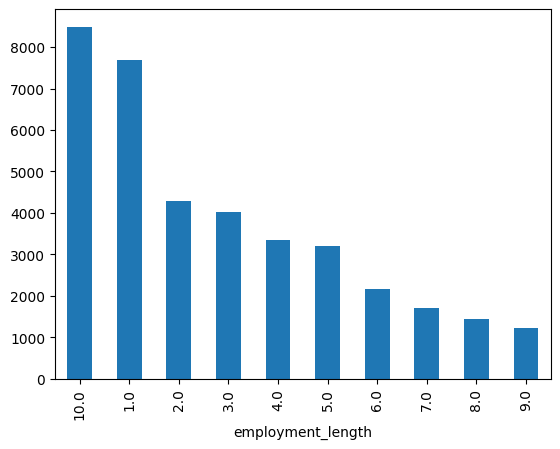

In [27]:
df_DueLoans['employment_length'].value_counts().plot(kind='bar');

La cantidad de préstamos solicitados es mayor cuanto menos tiempo se lleve trabajando, con la excepción de los que llevan más de 10 años. sin embargo, debemos tener en cuenta que este valor incluye todos los trabajadores con 10 o más años de actividad.

Vamos a calcular algunas estadísticas más de esta columna.

In [28]:
df_DueLoans['employment_length'].describe()

count    37544.000000
mean         5.061048
std          3.401750
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: employment_length, dtype: float64

Parece que la media está en 5 años, mientras que la mediana está en 4 años. No parece que ninguno de los dos valores sean representativos de los valores más comunes del dataframe. Quizás la mejor opción sería repartir las 1033 filas NaN con el porcentaje respectivo de cada uno de los valores del "employment_length"

In [29]:
df_DueLoans[['employment_length']].value_counts(normalize=True, dropna=True) * 100

employment_length
10.0                 22.608140
1.0                  20.448008
2.0                  11.429256
3.0                  10.686128
4.0                   8.901556
5.0                   8.507351
6.0                   5.774558
7.0                   4.557319
8.0                   3.822182
9.0                   3.265502
Name: proportion, dtype: float64

Dado que lo que queremos estudiar es la incidencia del tiempo en que el prestatario está empleado en el pago o cancelación del préstamo, las opciones que tenemos a seguir con estas filas de Nan son dos:

1. Hacer el estudio sin tener en cuenta las Nan. Estamos hablando de 1033 filas de un total de 38.577, es decir, del 2,67% del total
2. Otra opción sería ver la incidencia de las filas Nan en cada grupo a estudiar (pagado o cancelado) y ver el reparto porcentual del valor de los "employment_length" en cada grupo, para a continuación imputar aleatoriamente un valor a las filas Nan en función de estos porcentajes. 

Vamos a proceder si hay diferencias significativas entre ambos grupos, aunque de momento, de menra visual.

In [30]:
df_DueLoans[df_DueLoans['loan_status']=='fully paid']['employment_length'].value_counts(normalize=True, dropna=True) * 100

employment_length
10.0    22.264738
1.0     20.475968
2.0     11.585005
3.0     10.754394
4.0      8.959403
5.0      8.511433
6.0      5.789392
7.0      4.504589
8.0      3.832633
9.0      3.322445
Name: proportion, dtype: float64

In [31]:
df_DueLoans[df_DueLoans['loan_status']=='charged off']['employment_length'].value_counts(normalize=True, dropna=True) * 100

employment_length
10.0    24.652713
1.0     20.281534
2.0     10.501945
3.0     10.279681
4.0      8.557140
5.0      8.483052
6.0      5.686238
7.0      4.871272
8.0      3.759956
9.0      2.926468
Name: proportion, dtype: float64

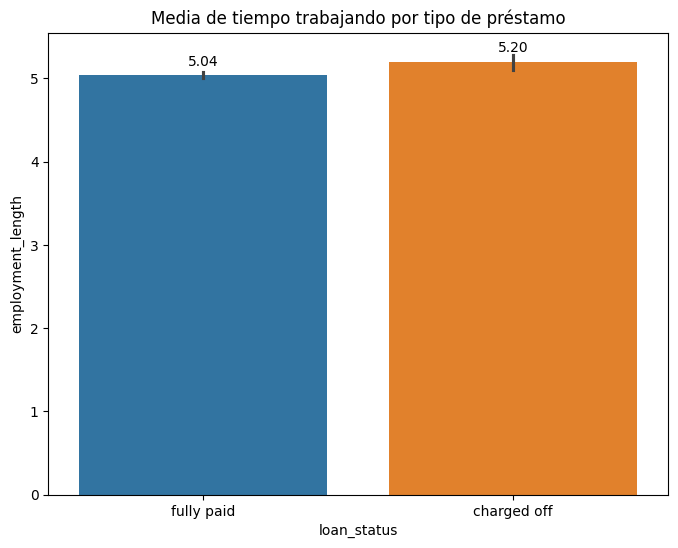

In [32]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_DueLoans, x='loan_status', y='employment_length', hue='loan_status', legend='auto', estimator='mean');
plt.title('Media de tiempo trabajando por tipo de préstamo')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', xytext=(0, 10), textcoords='offset points')


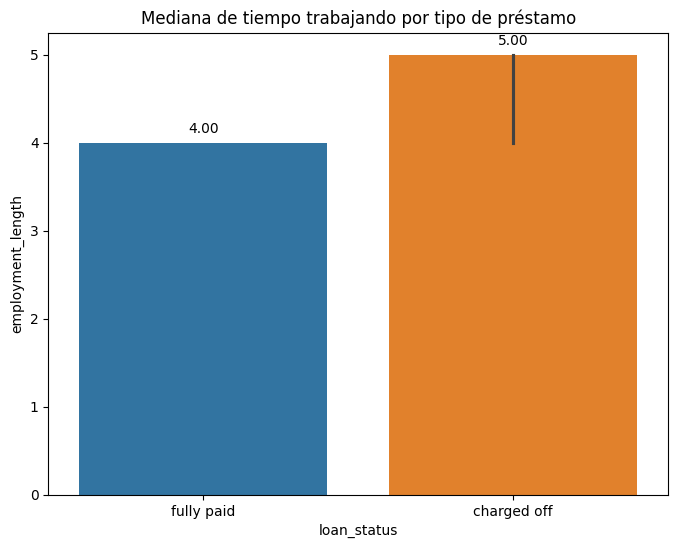

In [33]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_DueLoans, x='loan_status', y='employment_length', hue='loan_status', legend='auto', estimator='median');
plt.title('Mediana de tiempo trabajando por tipo de préstamo')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

Parece que hay diferencias, que podrían ser significativas, entre un grupo y otro (préstamo pagado y cancelado). Asignar los valores Nan de manera aleatoria sin atender a ningún criterio podría tener consecuencias en nuestro análisis. Una solución podrías ser asignar los valores Nan en las proporciones que se reflejan más arriba. Sin embargo, cuaqluier decisión no dejaría de ser subjetiva y rellenar los valores Nan respecto a porcentajes tendría el mismo efecto en nuestro estudio que si los obviamos. 

Estudiamos en más detalle esta columna. Creamos un dataframe que incluya solo las filas con Nan

In [34]:
df_nan = df_DueLoans[df_DueLoans['employment_length'].isna()]
df_nan

,id,loan_status,loan_amount,funded_amount_by_investors,loan_term,interest_rate,installment,grade,sub_grade,verification_status,issued_on,purpose,dti,inquiries_last_6_months,open_credit_lines,derogatory_public_records,revolving_line_utilization_rate,total_credit_lines,employment_length,employer_title,home_ownership,annual_income
168,1067644,charged off,2500,2500.00000,36,7.51,77.78,a,a3,source verified,2011-12-01,debt_consolidation,16.30,2,13,0,42.2,20,NaN,NaN,own,12000.0
323,1058717,fully paid,18000,18000.00000,60,17.58,452.98,d,d4,verified,2011-12-01,debt_consolidation,21.96,1,11,0,83.7,28,NaN,NaN,mortgage,60000.0
394,1064582,fully paid,4000,4000.00000,36,11.71,132.31,b,b3,source verified,2011-12-01,home_improvement,7.50,0,4,0,54.9,6,NaN,NaN,rent,24000.0
422,1064366,charged off,1000,1000.00000,36,14.65,34.50,c,c3,not verified,2011-12-01,major_purchase,6.00,2,3,1,83.7,8,NaN,NaN,rent,18408.0
439,1063912,fully paid,8250,8250.00000,36,7.51,256.67,a,a3,verified,2011-12-01,debt_consolidation,17.87,4,17,0,10.4,37,NaN,NaN,mortgage,31500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32591,480410,fully paid,10000,9975.00000,36,14.22,342.85,c,c5,not verified,2010-01-01,small_business,4.51,0,9,0,66.4,17,NaN,NaN,rent,45000.0
32608,480216,fully paid,3700,3700.00000,36,14.22,126.86,c,c5,not verified,2010-01-01,other,3.36,0,2,0,45.9,5,NaN,NaN,rent,17496.8
32621,479954,charged off,10000,9731.17513,36,14.22,342.85,c,c5,not verified,2010-01-01,other,3.83,3,3,0,34.4,19,NaN,NaN,mortgage,36000.0
32631,479836,fully paid,6000,6000.00000,36,12.73,201.40,c,c1,not verified,2010-01-01,moving,12.80,0,7,1,63.3,12,NaN,tong parks,mortgage,60000.0


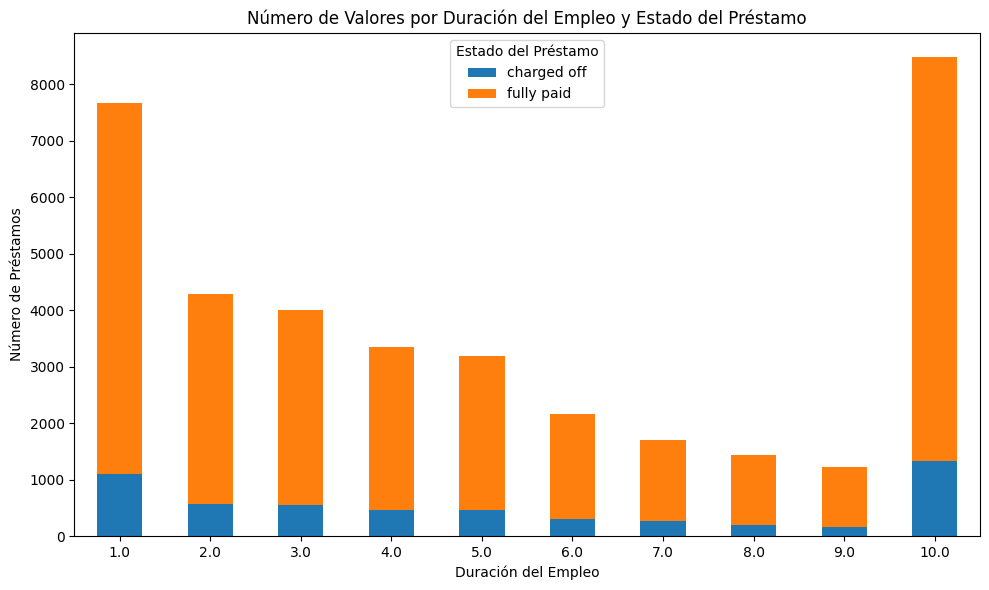

In [35]:
# Conteo de valores de 'employment_length' discriminando por 'loan_status'
pivot_df = df_DueLoans.pivot_table(index='employment_length', columns='loan_status', aggfunc='size', fill_value=0)

# Crear el gráfico de barras apiladas
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Configuración del gráfico
plt.xlabel('Duración del Empleo')
plt.ylabel('Número de Préstamos')
plt.title('Número de Valores por Duración del Empleo y Estado del Préstamo')
plt.legend(title='Estado del Préstamo')
plt.xticks(rotation=0)  # Rotar etiquetas del eje x si es necesario

# Mostrar el gráfico
plt.tight_layout()
plt.show()

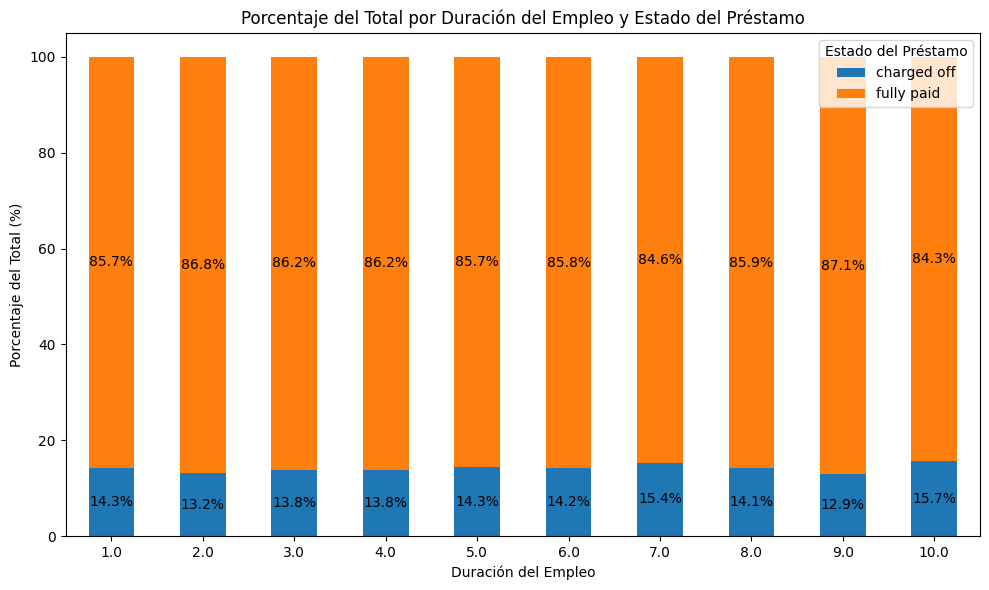

In [36]:
# Conteo de valores de 'employment_length' discriminando por 'loan_status'
pivot_df3 = df_DueLoans.pivot_table(index='employment_length', columns='loan_status', aggfunc='size', fill_value=0)

# Calcular los porcentajes
totals = pivot_df3.sum(axis=1)
percentage_df = pivot_df3.div(totals, axis=0) * 100

# Crear el gráfico de barras apiladas con porcentajes y etiquetas
ax = percentage_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Configuración del gráfico
plt.xlabel('Duración del Empleo')
plt.ylabel('Porcentaje del Total (%)')
plt.title('Porcentaje del Total por Duración del Empleo y Estado del Préstamo')
plt.legend(title='Estado del Préstamo')
plt.xticks(rotation=0)  # Rotar etiquetas del eje x si es necesario

# Agregar etiquetas con los porcentajes a las barras
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', color='black')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [37]:
df_DueLoans.head(5)

,id,loan_status,loan_amount,funded_amount_by_investors,loan_term,interest_rate,installment,grade,sub_grade,verification_status,issued_on,purpose,dti,inquiries_last_6_months,open_credit_lines,derogatory_public_records,revolving_line_utilization_rate,total_credit_lines,employment_length,employer_title,home_ownership,annual_income
0,1077501,fully paid,5000,4975.0,36,10.65,162.87,b,b2,verified,2011-12-01,credit_card,27.65,1,3,0,83.7,9,10.0,NaN,rent,24000.0
1,1077430,charged off,2500,2500.0,60,15.27,59.83,c,c4,source verified,2011-12-01,car,1.00,5,3,0,9.4,4,1.0,ryder,rent,30000.0
2,1077175,fully paid,2400,2400.0,36,15.96,84.33,c,c5,not verified,2011-12-01,small_business,8.72,2,2,0,98.5,10,10.0,NaN,rent,12252.0
3,1076863,fully paid,10000,10000.0,36,13.49,339.31,c,c1,source verified,2011-12-01,other,20.00,1,10,0,21.0,37,10.0,air resources board,rent,49200.0
5,1075269,fully paid,5000,5000.0,36,7.90,156.46,a,a4,source verified,2011-12-01,wedding,11.20,3,9,0,28.3,12,3.0,veolia transportaton,rent,36000.0


De todas las columnas que tenemos, no vamos a necesitar algunas de ellas. En concreto, las siguientes columnas las vamos a eliminar de nuestro análisis:

* 'funded_amount_by_investors': se trata de la cantidad ingresada en cuenta, deducidas las comisiones. No vamos a estudiar esta cifra. 
* 'grade': Se trata de una clasificación realizada por el Lending Club. No la vamos a tener en cuenta en nuestro análisis
* 'sub_grade': Subgrado otorgado por el LC. No lo vamos a tener en cuenta.
* 'issued_on': La fecha en que se aprobó el préstamo. Es irrelevante para saber si se va a pagar o no.
* 'inquiries_last_6_month': números de consultas del prestatario en los últimos 6 meses. Entendemos que no afecta a si el préstamo se va a pagar o no.
* 'derogatory_public_records': registros públicos negativos. No los vamos a tener en cuenta en nuestro análisis.
* 'total_credit_lines': es el número de créditos totales del prestatario en la base de datos. No lo vamos a tener en cuenta en nuestro estudio.
* 'employer_title': es irrelevante y tiene una alta cardinalidad. La eliminamos. 


In [38]:
columnas_eliminar = ['funded_amount_by_investors', 'grade', 'sub_grade', 'issued_on', 'inquiries_last_6_months', 'derogatory_public_records', 'total_credit_lines', 'employer_title']
df_clean = df_DueLoans.drop(columnas_eliminar, axis=1)
df_clean.head(10)

,id,loan_status,loan_amount,loan_term,interest_rate,installment,verification_status,purpose,dti,open_credit_lines,revolving_line_utilization_rate,employment_length,home_ownership,annual_income
0,1077501,fully paid,5000,36,10.65,162.87,verified,credit_card,27.65,3,83.7,10.0,rent,24000.0
1,1077430,charged off,2500,60,15.27,59.83,source verified,car,1.00,3,9.4,1.0,rent,30000.0
2,1077175,fully paid,2400,36,15.96,84.33,not verified,small_business,8.72,2,98.5,10.0,rent,12252.0
3,1076863,fully paid,10000,36,13.49,339.31,source verified,other,20.00,10,21.0,10.0,rent,49200.0
5,1075269,fully paid,5000,36,7.90,156.46,source verified,wedding,11.20,9,28.3,3.0,rent,36000.0
6,1069639,fully paid,7000,60,15.96,170.08,not verified,debt_consolidation,23.51,7,85.6,8.0,rent,47004.0
7,1072053,fully paid,3000,36,18.64,109.43,source verified,car,5.35,4,87.5,9.0,rent,48000.0
8,1071795,charged off,5600,60,21.28,152.39,source verified,small_business,5.55,11,32.6,4.0,own,40000.0
9,1071570,charged off,5375,60,12.69,121.45,verified,other,18.08,2,36.5,1.0,rent,15000.0
10,1070078,fully paid,6500,60,14.65,153.45,not verified,debt_consolidation,16.12,14,20.6,5.0,own,72000.0


In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               38577 non-null  int64  
 1   loan_status                      38577 non-null  object 
 2   loan_amount                      38577 non-null  int64  
 3   loan_term                        38577 non-null  int64  
 4   interest_rate                    38577 non-null  float64
 5   installment                      38577 non-null  float64
 6   verification_status              38577 non-null  object 
 7   purpose                          38577 non-null  object 
 8   dti                              38577 non-null  float64
 9   open_credit_lines                38577 non-null  int64  
 10  revolving_line_utilization_rate  38527 non-null  float64
 11  employment_length                37544 non-null  float64
 12  home_ownership         

In [40]:
df_clean.isna().sum()

id                                    0
loan_status                           0
loan_amount                           0
loan_term                             0
interest_rate                         0
installment                           0
verification_status                   0
purpose                               0
dti                                   0
open_credit_lines                     0
revolving_line_utilization_rate      50
employment_length                  1033
home_ownership                        0
annual_income                         0
dtype: int64

In [41]:
df_clean.nunique()

id                                 38577
loan_status                            2
loan_amount                          870
loan_term                              2
interest_rate                        370
installment                        15022
verification_status                    3
purpose                               14
dti                                 2853
open_credit_lines                     40
revolving_line_utilization_rate     1088
employment_length                     10
home_ownership                         5
annual_income                       5215
dtype: int64

In [42]:
df_clean['loan_status'].value_counts()

loan_status
fully paid     32950
charged off     5627
Name: count, dtype: int64

In [43]:
df_clean['loan_term'].value_counts()

loan_term
36    29096
60     9481
Name: count, dtype: int64

In [44]:
df_clean['verification_status'].value_counts()

verification_status
not verified       16694
verified           12206
source verified     9677
Name: count, dtype: int64

In [45]:
df_clean['purpose'].value_counts()

purpose
debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: count, dtype: int64

In [46]:
df_clean['open_credit_lines'].value_counts()

open_credit_lines
7     3909
6     3846
8     3814
9     3607
5     3111
10    3097
11    2666
4     2300
12    2198
13    1855
3     1470
14    1427
15    1146
16     908
17     716
2      596
18     516
19     384
20     281
21     235
22     137
23      93
24      75
25      53
26      34
28      24
27      22
30      15
29      13
31       7
34       5
35       4
32       3
33       3
36       2
39       1
38       1
44       1
41       1
42       1
Name: count, dtype: int64

In [54]:
df_clean['home_ownership'].value_counts()

home_ownership
rent        18480
mortgage    17021
own          2975
other          98
none            3
Name: count, dtype: int64

In [60]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               38577 non-null  int64  
 1   loan_status                      38577 non-null  object 
 2   loan_amount                      38577 non-null  int64  
 3   loan_term                        38577 non-null  int64  
 4   interest_rate                    38577 non-null  float64
 5   installment                      38577 non-null  float64
 6   verification_status              38577 non-null  object 
 7   purpose                          38577 non-null  object 
 8   dti                              38577 non-null  float64
 9   open_credit_lines                38577 non-null  int64  
 10  revolving_line_utilization_rate  38527 non-null  float64
 11  employment_length                37544 non-null  float64
 12  home_ownership         

In [47]:
df_clean['interest_rate'].value_counts()

interest_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: count, Length: 370, dtype: int64

In [58]:
df_clean['interest_rate'].nunique()

370

<Axes: xlabel='interest_rate', ylabel='Count'>

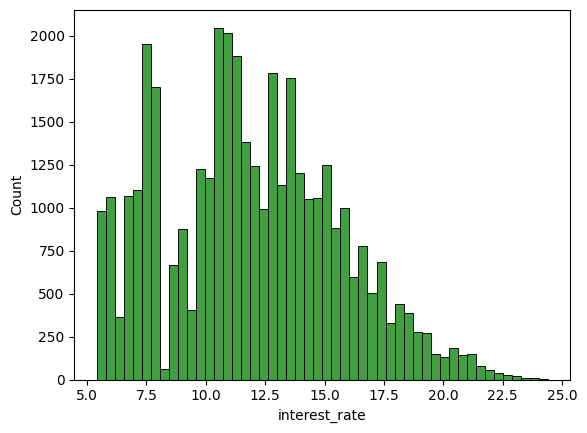

In [53]:
sns.histplot(df_clean['interest_rate'], bins=50, kde=False, color='green')

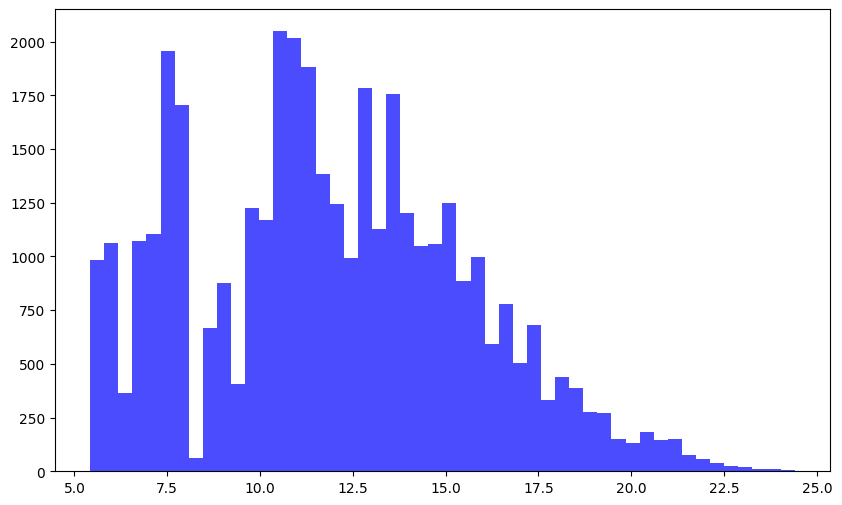

In [54]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(df_clean['interest_rate'], bins=50, alpha=0.7, color='blue');

In [55]:
df_clean['purpose'].value_counts()

purpose
debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: count, dtype: int64

In [59]:
df_clean['purpose'].nunique()

14

<Axes: xlabel='purpose'>

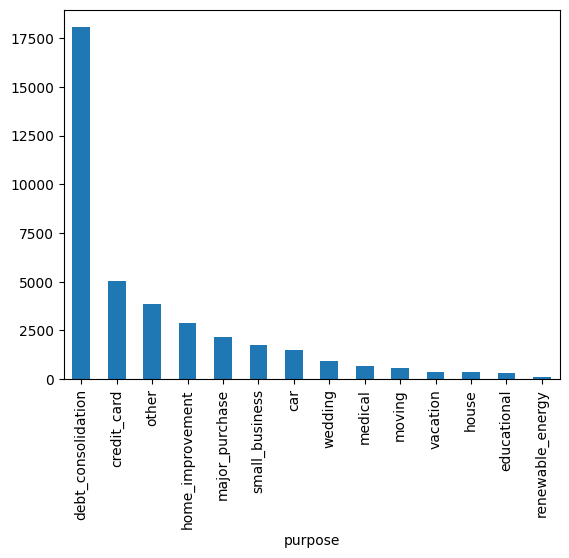

In [61]:
valores_purpose = df_clean['purpose'].value_counts()
valores_purpose.plot(kind='bar')

In [62]:
df_clean['dti'].value_counts()

dti
0.00     178
12.00     46
18.00     45
19.20     39
13.20     39
        ... 
28.95      1
25.85      1
25.77      1
27.20      1
25.43      1
Name: count, Length: 2853, dtype: int64

In [63]:
df_clean['dti'].nunique()

2853

<Axes: xlabel='dti', ylabel='Count'>

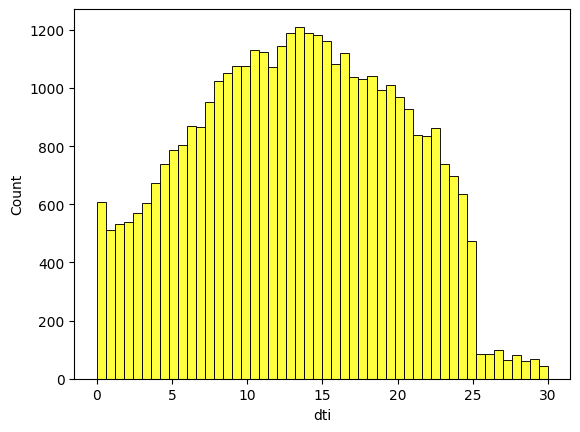

In [64]:
sns.histplot(df_clean['dti'], bins=50, kde=False, color='yellow')

In [65]:
df_clean['revolving_line_utilization_rate'].value_counts()

revolving_line_utilization_rate
0.00     954
0.20      62
63.00     62
40.70     57
31.20     57
        ... 
77.63      1
25.74      1
0.83       1
47.36      1
7.28       1
Name: count, Length: 1088, dtype: int64

In [66]:
df_clean['revolving_line_utilization_rate'].nunique()

1088

<Axes: xlabel='revolving_line_utilization_rate', ylabel='Count'>

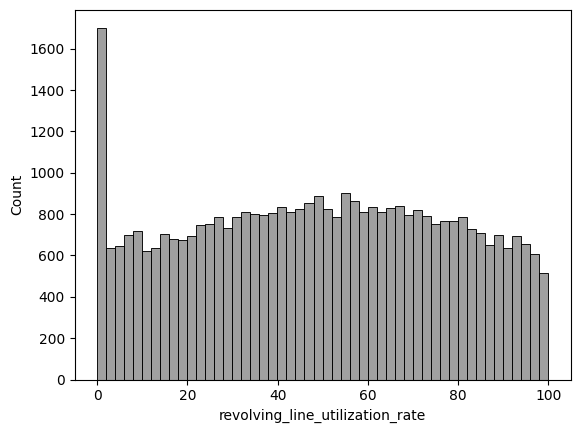

In [67]:
sns.histplot(df_clean['revolving_line_utilization_rate'], bins=50, kde=False, color='gray')

In [68]:
df_clean['employment_length'].value_counts()

employment_length
10.0    8488
1.0     7677
2.0     4291
3.0     4012
4.0     3342
5.0     3194
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: count, dtype: int64

In [69]:
df_clean['employment_length'].nunique()

10

<Axes: xlabel='employment_length'>

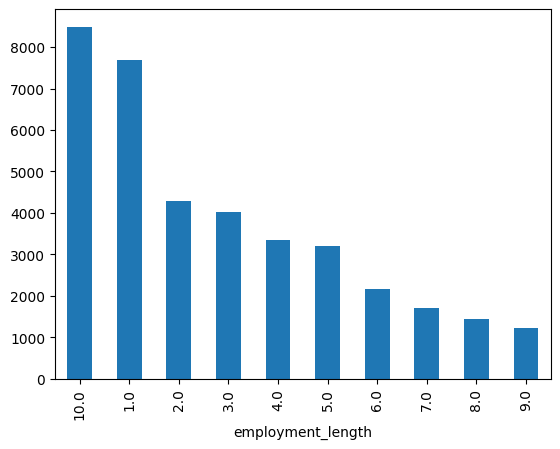

In [71]:
valores_employment_length = df_clean['employment_length'].value_counts()
valores_employment_length.plot(kind='bar')

In [72]:
df_clean['home_ownership'].value_counts()

home_ownership
rent        18480
mortgage    17021
own          2975
other          98
none            3
Name: count, dtype: int64

In [73]:
df_clean['home_ownership'].nunique()

5

<Axes: xlabel='home_ownership'>

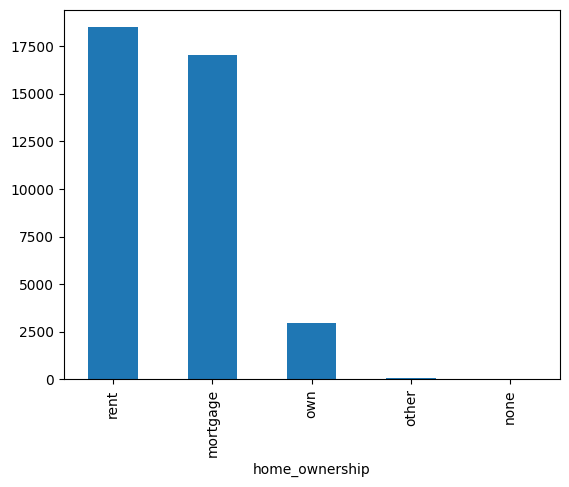

In [74]:
valores_home_ownership = df_clean['home_ownership'].value_counts()
valores_home_ownership.plot(kind='bar')

In [75]:
df_clean['annual_income'].value_counts()

annual_income
60000.0     1466
50000.0     1029
40000.0      855
45000.0      811
30000.0      808
            ... 
80569.0        1
82116.0        1
242400.0       1
133300.0       1
27376.0        1
Name: count, Length: 5215, dtype: int64

In [76]:
df_clean['annual_income'].nunique()

5215

In [84]:
df_clean['annual_income']


0         24000.0
1         30000.0
2         12252.0
3         49200.0
5         36000.0
           ...   
39712    110000.0
39713     18000.0
39714    100000.0
39715    200000.0
39716     22000.0
Name: annual_income, Length: 38577, dtype: float64

In [96]:
df_clean.astype({'annual_income': 'int64'}).dtypes

id                                   int64
loan_status                         object
loan_amount                          int64
loan_term                            int64
interest_rate                      float64
installment                        float64
verification_status                 object
purpose                             object
dti                                float64
open_credit_lines                    int64
revolving_line_utilization_rate    float64
employment_length                  float64
home_ownership                      object
annual_income                        int64
dtype: object

In [97]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               38577 non-null  int64  
 1   loan_status                      38577 non-null  object 
 2   loan_amount                      38577 non-null  int64  
 3   loan_term                        38577 non-null  int64  
 4   interest_rate                    38577 non-null  float64
 5   installment                      38577 non-null  float64
 6   verification_status              38577 non-null  object 
 7   purpose                          38577 non-null  object 
 8   dti                              38577 non-null  float64
 9   open_credit_lines                38577 non-null  int64  
 10  revolving_line_utilization_rate  38527 non-null  float64
 11  employment_length                37544 non-null  float64
 12  home_ownership         

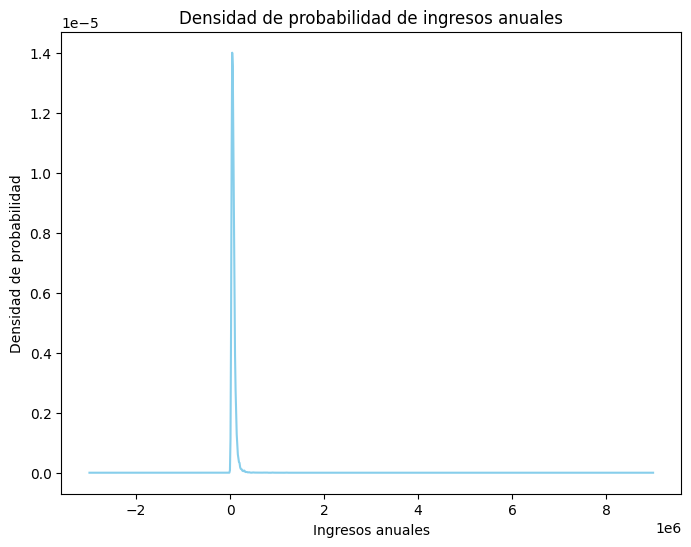

In [98]:
plt.figure(figsize=(8, 6))
df_clean['annual_income'].plot(kind='density', color='skyblue')
plt.title('Densidad de probabilidad de ingresos anuales')
plt.xlabel('Ingresos anuales')
plt.ylabel('Densidad de probabilidad')
plt.show()

In [100]:
df_clean['annual_income'].describe()

count     38577.00
mean      68777.97
std       64218.68
min        4000.00
25%       40000.00
50%       58868.00
75%       82000.00
max     6000000.00
Name: annual_income, dtype: float64

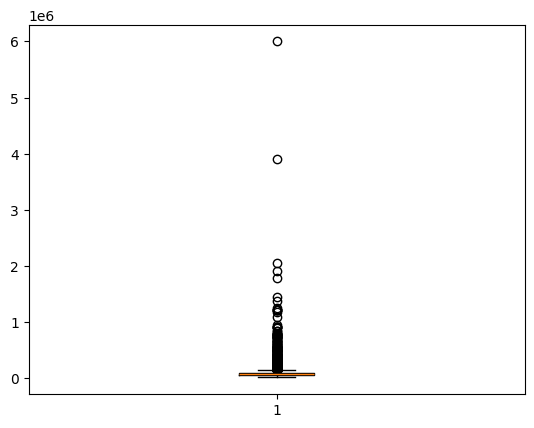

In [101]:
plt.boxplot(df_clean['annual_income'])
plt.show()

In [103]:
Q1 = df_clean['annual_income'].quantile(0.25)
Q3 = df_clean['annual_income'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los valores que no son outliers
datos_filtrados = df_clean[(df_clean['annual_income'] >= limite_inferior) & (df_clean['annual_income'] <= limite_superior)]

print("Datos filtrados sin outliers:")
datos_filtrados

Datos filtrados sin outliers:


,id,loan_status,loan_amount,loan_term,interest_rate,installment,verification_status,purpose,dti,open_credit_lines,revolving_line_utilization_rate,employment_length,home_ownership,annual_income
0,1077501,fully paid,5000,36,10.65,162.87,verified,credit_card,27.65,3,83.70,10.00,rent,24000.00
1,1077430,charged off,2500,60,15.27,59.83,source verified,car,1.00,3,9.40,1.00,rent,30000.00
2,1077175,fully paid,2400,36,15.96,84.33,not verified,small_business,8.72,2,98.50,10.00,rent,12252.00
3,1076863,fully paid,10000,36,13.49,339.31,source verified,other,20.00,10,21.00,10.00,rent,49200.00
5,1075269,fully paid,5000,36,7.90,156.46,source verified,wedding,11.20,9,28.30,3.00,rent,36000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39711,92402,fully paid,5000,36,8.70,158.30,not verified,credit_card,15.55,10,23.00,5.00,mortgage,75000.00
39712,92187,fully paid,2500,36,8.07,78.42,not verified,home_improvement,11.33,13,13.10,4.00,mortgage,110000.00
39713,90665,fully paid,8500,36,10.28,275.38,not verified,credit_card,6.40,6,26.90,3.00,rent,18000.00
39714,90395,fully paid,5000,36,8.07,156.84,not verified,debt_consolidation,2.30,11,19.40,1.00,mortgage,100000.00


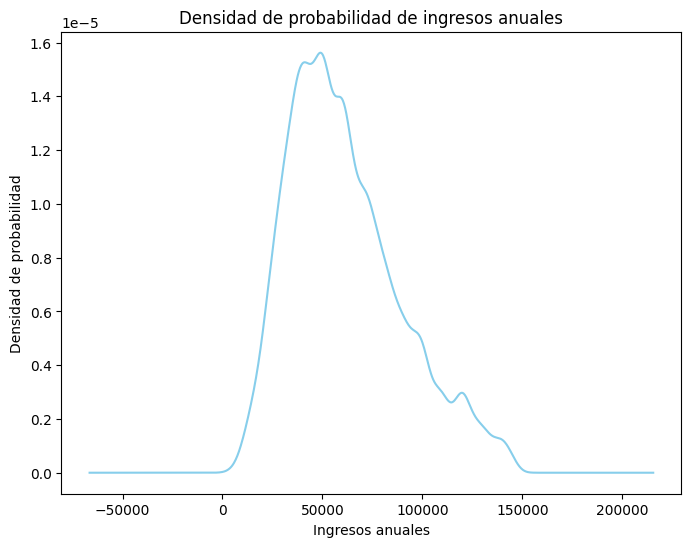

In [104]:
plt.figure(figsize=(8, 6))
datos_filtrados['annual_income'].plot(kind='density', color='skyblue')
plt.title('Densidad de probabilidad de ingresos anuales')
plt.xlabel('Ingresos anuales')
plt.ylabel('Densidad de probabilidad')
plt.show()